# Linear LFM

Replication of the paper by [Lawrence et al., 2006.](https://papers.nips.cc/paper/3119-modelling-transcriptional-regulation-using-gaussian-processes.pdf)

The dataset required is small and is available preprocessed here:

- https://drive.google.com/drive/folders/1Tg_3SlKbdv0pDog6k2ys0J79e1-vgRyd?usp=sharing

### Probesets

The original paper restricted their interest to 5 known targets of p53:

| Target       | Probeset     | Aliases    |
| :------------- | :----------: | :----------- |
| DDB2 |  203409_at    | |
| p21   | 202284_s_at | p21CIP1, CDKN1A |
| SESN1/hPA26   | 218346_s_at |  |
| BIK   | 205780_at |  |
| TNFRSF10b   | 209294_x_at, 209295_at, 210405_x_at |  |

In [1]:
import torch
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood
from matplotlib import pyplot as plt
from os import path

from lafomo.models import ExactLFM
from lafomo.trainer import ExactTrainer
from lafomo.datasets import P53Data
from lafomo.plot import Plotter

In [2]:
dataset = P53Data(replicate=0, data_dir='../../../data/')
model = ExactLFM(dataset, dataset.variance.reshape(-1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.07)

loss_fn = ExactMarginalLogLikelihood(model.likelihood, model)

trainer = ExactTrainer(model, optimizer, dataset, loss_fn=loss_fn)
plotter = Plotter(model, dataset.gene_names)


In [3]:
model.likelihood.train()
trainer.train(epochs=150, report_interval=10)

Epoch 001/150 - Loss: 1.23 (1.23) λ: [1.3793774]
Epoch 011/150 - Loss: 1.06 (1.06) λ: [1.1401758]
Epoch 021/150 - Loss: 0.90 (0.90) λ: [1.0616502]
Epoch 031/150 - Loss: 0.74 (0.74) λ: [1.120475]
Epoch 041/150 - Loss: 0.60 (0.60) λ: [1.3214924]
Epoch 051/150 - Loss: 0.48 (0.48) λ: [1.7255083]
Epoch 061/150 - Loss: 0.39 (0.39) λ: [1.991529]
Epoch 071/150 - Loss: 0.33 (0.33) λ: [1.8353537]
Epoch 081/150 - Loss: 0.29 (0.29) λ: [1.4144373]
Epoch 091/150 - Loss: 0.27 (0.27) λ: [1.0869147]
Epoch 101/150 - Loss: 0.26 (0.26) λ: [1.0311072]
Epoch 111/150 - Loss: 0.25 (0.25) λ: [1.0939671]
Epoch 121/150 - Loss: 0.25 (0.25) λ: [1.1369936]
Epoch 131/150 - Loss: 0.24 (0.24) λ: [1.1303461]
Epoch 141/150 - Loss: 0.24 (0.24) λ: [1.1223714]


MultivariateNormal(loc: torch.Size([1, 80]), covariance_matrix: torch.Size([1, 80, 80]))


C:\Users\Jacob\Documents\proj\lafomo\lafomo\plot\plotter.py:113: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


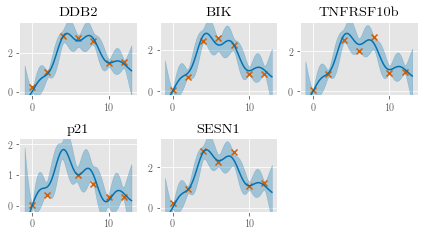

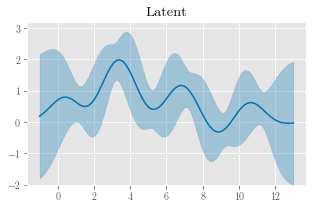

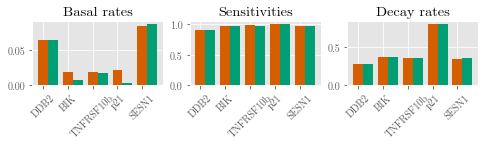

In [4]:
root_dir = '../../../'
experiment_dir = path.join(root_dir, 'experiments/exact')

t_predict = torch.linspace(-1, 13, 80, dtype=torch.float64)

plotter.plot_outputs(t_predict, t_scatter=dataset.t_observed, y_scatter=dataset.m_observed)
plt.savefig(path.join(experiment_dir, 'outputs.pdf'), bbox_inches = 'tight', pad_inches = 0)

plotter.plot_latents(t_predict, ylim=(-2, 3.2), num_samples=0)
plt.savefig(path.join(experiment_dir, 'latents.pdf'), bbox_inches = 'tight', pad_inches = 0)

plotter.plot_kinetics()
plt.savefig(path.join(experiment_dir, 'kinetics.pdf'), bbox_inches = 'tight', pad_inches = 0)

In [5]:
print(list(model.likelihood.noise_covar.noise))

[tensor(0.0013, grad_fn=<UnbindBackward>)]


tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.9872e-01,  4.1641e-01,  5.5389e-01,  ...,  6.7658e-04,
          5.5656e-04,  4.2953e-04],
        [ 1.6957e-02,  2.1970e-02,  2.6526e-02,  ...,  1.5813e-03,
          1.3037e-03,  1.0082e-03],
        ...,
        [-2.9145e-03, -3.9802e-03, -5.1638e-03,  ...,  9.2491e-03,
          7.6174e-03,  5.8898e-03],
        [-3.9440e-03, -5.3437e-03, -6.8621e-03,  ...,  4.2490e-02,
          3.5119e-02,  2.7175e-02],
        [-2.0626e-03, -2.7988e-03, -3.6009e-03,  ..., -6.6387e-02,
         -5.7068e-02, -4.5466e-02]], dtype=torch.float64,
       grad_fn=<CholeskySolveBackward>)
tensor(0.9290, dtype=torch.float64, grad_fn=<MaxBackward1>)
tensor(0.0720, dtype=torch.float64, grad_fn=<MinBackward1>)
tensor([[ 2.0524e-02,  2.9205e-02,  3.9819e-02,  ..., -3.5730e-05,
         -2.9224e-05, -2.2455e-05],
        [ 2.9205e-02,  4.1583e-02,  5.6738e-02,  ..., -4.8739e-05,
         -3.9817e

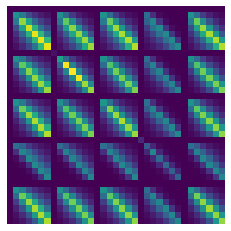

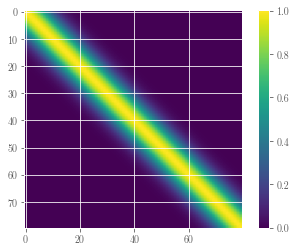

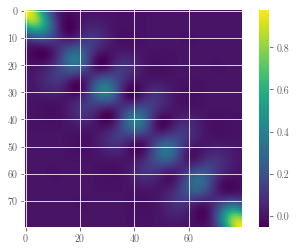

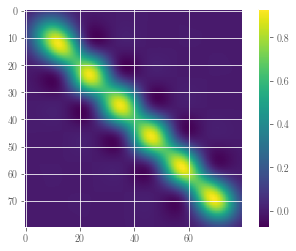

In [6]:
from matplotlib import pyplot as plt

Kxx = model.covar_module(model.train_t, model.train_t).evaluate()

plt.figure()
plt.imshow(Kxx.detach())
plt.axis('off')

Kxf = model.covar_module.K_xf(model.train_t, t_predict).type(torch.float64)

Kfx = torch.transpose(Kxf, 0, 1)
L = torch.cholesky(Kxx)

KxxKxf = torch.cholesky_solve(Kxf, L, upper=False)

# K_inv = torch.inverse(Kxx)

print(KxxKxf)
# KfxKxx = torch.matmul(torch.transpose(Kxf, 0, 1), K_inv)
# print(KfxKxx)
# mu = torch.matmul(KfxKxx, model.train_y).view(-1)
# plt.figure()
# plt.plot(mu.detach())

Kff = model.covar_module.K_ff(t_predict, t_predict)  # (100, 500)
plt.figure()
plt.imshow(Kff.detach())
plt.colorbar()
var = Kff - torch.matmul(Kfx, KxxKxf)
print(torch.diagonal(torch.matmul(Kfx, KxxKxf)).max())
print(torch.diagonal(var).min())
plt.figure()
plt.imshow(var.detach())
plt.colorbar()

plt.figure()
kfxf = torch.matmul(Kfx, KxxKxf)
print(kfxf)
plt.imshow(kfxf.detach())
plt.colorbar()

